In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pyhf
from pyhf import hfpdf
def prep_data(source):
    spec = {
        'singlechannel': {
            'signal': {
                'data': source['bindata']['sig'],
                'mods': [
                    {
                        'name': 'mu',
                        'type': 'normfactor',
                        'data': None
                    }
                ]
            },
            'background': {
                'data': source['bindata']['bkg'],
                'mods': [
                    {
                        'name': 'bkg_norm',
                        'type': 'histosys',
                        'data': {
                            'lo_hist': source['bindata']['bkgsys_dn'],
                            'hi_hist': source['bindata']['bkgsys_up'],
                        }
                    }
                ]
            }
        }
    }
    pdf  = hfpdf(spec)
    data = source['bindata']['data'] + pdf.auxdata
    return data, pdf

In [8]:
source = {
  "binning": [2,-0.5,1.5],
  "bindata": {
    "data":    [120.0, 180.0],
    "bkg":     [100.0, 150.0],
    "bkgsys_up":  [102, 190],
    "bkgsys_dn":  [98, 100],
    "sig":     [30.0, 95.0]
  }
}

d,pdf = prep_data(source)
init_pars = pdf.config.suggested_init()
par_bounds = pdf.config.suggested_bounds()

print (d), print(par_bounds), print(pdf.config.par_order)

[120.0, 180.0, 0]
[[-5, 5], [0, 10]]
['bkg_norm', 'mu']


(None, None, None)

/Users/lukas/Code/histfactory/pyhf/pyhf/__init__.py:13: RuntimeWarning: invalid value encountered in sqrt
  return norm.pdf(n, loc = lam, scale = np.sqrt(lam))
/Users/lukas/Code/histfactory/pyhf/pyhf/__init__.py:335: RuntimeWarning: divide by zero encountered in log
  sum = sum + np.log(_poisson_impl(d, lam))
/Users/lukas/Code/histfactory/pyhf/pyhf/__init__.py:386: RuntimeWarning: divide by zero encountered in double_scalars
  CLs  = CLb/CLsb


{'exp': [0.3111465634176961,
  0.42267247690595644,
  0.6105045741815445,
  0.8773493566399762,
  1.2116150897828568],
 'obs': 1.116174021214249}

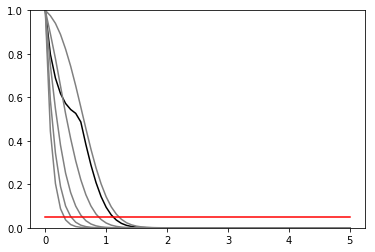

In [9]:
def plot_results(testmus,cls_obs, cls_exp, test_size = 0.05):
    plt.plot(mutests,cls_obs, c = 'k')
    for i,c in zip(range(5),['grey','grey','grey','grey','grey']):
        plt.plot(mutests,cls_exp[i], c = c)
    plt.plot(testmus,[test_size]*len(testmus), c = 'r')
    plt.ylim(0,1)

def CLsOnePoint(muTest,d,pdf, init_pars,par_bounds):
    clsobs, cls_exp = pyhf.runOnePoint(muTest, d,pdf,init_pars,par_bounds)[-2:]
    return 1./clsobs, [1./x for x in cls_exp]

def invert_interval(testmus,cls_obs, cls_exp, test_size = 0.05):
    point05cross = {'exp':[],'obs':None}
    for cls_exp_sigma in cls_exp:
        yvals = [x for x in cls_exp_sigma]
        point05cross['exp'].append(np.interp(test_size,list(reversed(yvals)),list(reversed(testmus))))
        
    yvals = cls_obs
    point05cross['obs'] = np.interp(test_size,list(reversed(yvals)),list(reversed(testmus)))
    return point05cross


CLsOnePoint(1.0,d,pdf,init_pars,par_bounds)


mutests = np.linspace(0,5,61)
tests = [CLsOnePoint(muTest,d,pdf,init_pars,par_bounds) for muTest in mutests]
cls_obs = [test[0]  for test in tests]
cls_exp = [[test[1][i]  for test in tests] for i in range(5)]
plot_results(mutests, cls_obs, cls_exp)
invert_interval(mutests, cls_obs, cls_exp)
